In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join
from aux import DrawCircles, ScaleImage
from circle import Find_Optimum_Circles

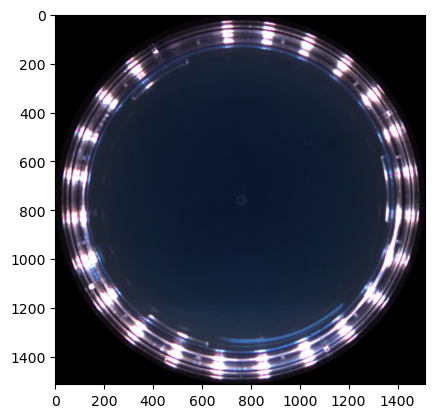

In [2]:
#get a list of files in the folder with pics
folder_path = os.path.abspath('.')+'/Smpl_Im'
processed_path = os.path.abspath('.')+'/Smpl_Thresh'
file_names = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
file = file_names[0]
new_name = os.path.join(processed_path, file)
image = cv2.imread(folder_path+'/'+file)
image = ScaleImage(image)
plt.imshow(image)
plt.show()

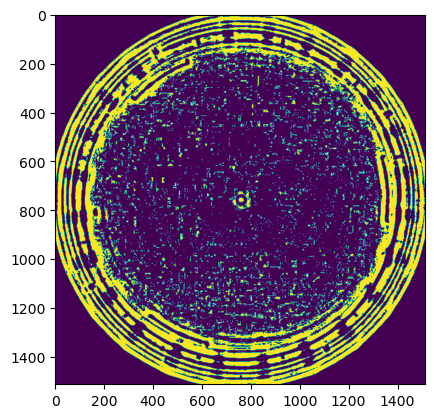

In [7]:
image = cv2.imread(folder_path+'/'+file)
image = ScaleImage(image)
th = cv2.adaptiveThreshold(image[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,41,2)
th = cv2.bitwise_not(th)
plt.imshow(th)
plt.show()


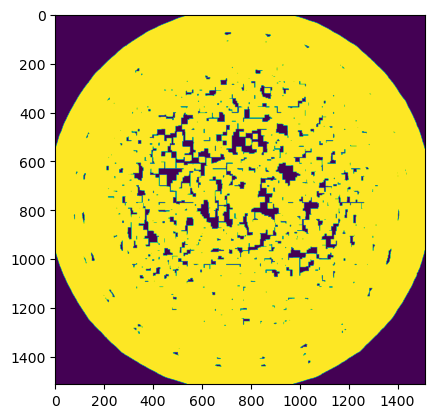

In [4]:
dilatation_size = 5
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(th , kernel, iterations = 5)
plt.imshow(dilated)
plt.show()

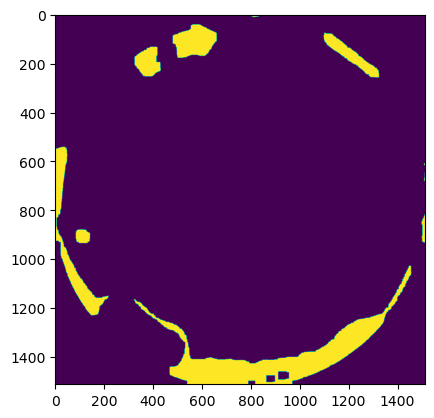

In [365]:
eroded = cv2.erode(dilated , kernel, iterations = 6)
plt.imshow(eroded)
plt.show()

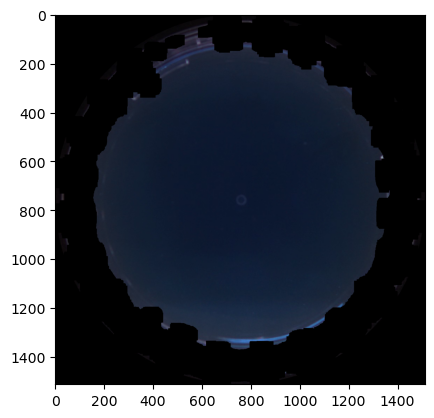

In [345]:
image = cv2.imread(folder_path+'/'+file)
image = ScaleImage(image)
mask = dilated<244
image[~mask] = 0
plt.imshow(image)
plt.show()

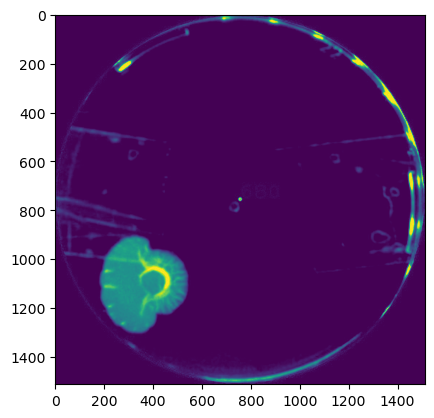

In [295]:
image = cv2.imread(folder_path+'/'+file)
image = ScaleImage(image)
plt.imshow(image[:,:,2])
plt.show()

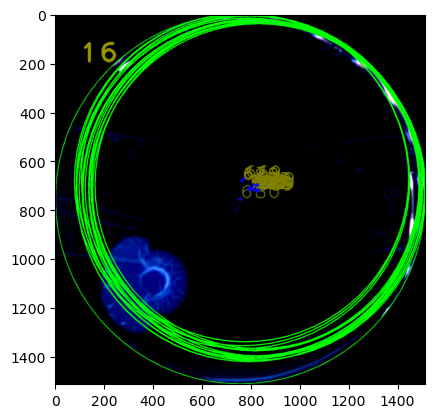

In [297]:

#These are the Hough Transform parameters that we are going to use
image = cv2.imread(folder_path+'/'+file)
image = ScaleImage(image)
accum_res  = 3 # image resolution/accum resolution, 4 means accum is 1/4th of image
min_between = 4 #Min dist between circles. 
minRadius = 610 #Min radius of a circle. 
maxRadius= 730 #The bigest circle expected
Canny_thr = 1100 #anything above that is an edge automatically in Canny, the lower threshold is half of that.
Accum_thr = 1100 #accumulator threshold for the circle centers at the detection stage
params = [accum_res, min_between, Canny_thr, Accum_thr, minRadius, maxRadius]
Circles = Find_Optimum_Circles(params_Hough=params, img = image, min_num  = 5, max_num = 20)
DrawCircles(Circles, image)
plt.imshow(image)
plt.show()

In [9]:
from aux import Circular_mask
edge_mask = Circular_mask(th.shape[0], th.shape[1], radius = 500)

In [10]:
np.count_nonzero(edge_mask)

785349

In [8]:
np.count_nonzero(th) 

548346

In [11]:
np.count_nonzero(th[edge_mask])

54460

In [12]:
edge_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])